### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ
#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

# ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5
# Бинарная классификация
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

### Москва 2022

#### Вариант 8 

Breast Cancer Wisconsin (Diagnostic) Data Set 

Название файла: wdbc.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) 

Класс: Outcome (столбец No 1) 

Метод отбора признаков – отбор на основе важности признаков (ExtraTreesClassifier) 

Модели классификации: 

-       классификатор ближайших соседей (к-во соседей = 3) 

-       классификатор ближайших соседей (к-во соседей = 5) 

-       классификатор LDA 

Кривая для визуализации - ROC-кривая 

#### Задание 1
Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.  

In [1]:
import pandas as pd

# считываем данные в объект DataFrame
my_data = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)
my_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Задание 2
Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

Столбец с метками класса.

In [2]:
my_data[1].unique()

array(['M', 'B'], dtype=object)

Пропущенных значений нет + в наборе изначально два класса.

Преобразуем символьные метки в числовые

In [3]:
my_data[1] = my_data[1].replace('M', 1)
my_data[1] = my_data[1].replace('B', 0)
y = my_data[1]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: 1, Length: 569, dtype: int64

#### Задание 3
Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  

In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null int64
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(2)
memor

Пропущенных значений нет (информация из описания датасета), все признаки числовые.

#### Задание 4
Выполните стандартизацию признаков набора данных.  

Воспользуемся библиотекой scikit-learn, класс StandardScaler.

In [5]:
from sklearn.preprocessing import StandardScaler

X = my_data.drop(1, axis=1)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print(X[0:3])

[[-2.36405166e-01  1.09706398e+00 -2.07333501e+00  1.26993369e+00
   9.84374905e-01  1.56846633e+00  3.28351467e+00  2.65287398e+00
   2.53247522e+00  2.21751501e+00  2.25574689e+00  2.48973393e+00
  -5.65265059e-01  2.83303087e+00  2.48757756e+00 -2.14001647e-01
   1.31686157e+00  7.24026158e-01  6.60819941e-01  1.14875667e+00
   9.07083081e-01  1.88668963e+00 -1.35929347e+00  2.30360062e+00
   2.00123749e+00  1.30768627e+00  2.61666502e+00  2.10952635e+00
   2.29607613e+00  2.75062224e+00  1.93701461e+00]
 [-2.36403445e-01  1.82982061e+00 -3.53632408e-01  1.68595471e+00
   1.90870825e+00 -8.26962447e-01 -4.87071673e-01 -2.38458552e-02
   5.48144156e-01  1.39236330e-03 -8.68652457e-01  4.99254601e-01
  -8.76243603e-01  2.63326966e-01  7.42401948e-01 -6.05350847e-01
  -6.92926270e-01 -4.40780058e-01  2.60162067e-01 -8.05450380e-01
  -9.94437403e-02  1.80592744e+00 -3.69203222e-01  1.53512599e+00
   1.89048899e+00 -3.75611957e-01 -4.30444219e-01 -1.46748968e-01
   1.08708430e+00 -2.4388

#### Задание 5
Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.

*Метод отбора признаков – отбор на основе важности признаков (ExtraTreesClassifier)*

In [12]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.00402539 0.05717581 0.01563336 0.06584532 0.0586328  0.01005785
 0.01893263 0.06407292 0.08747891 0.00698228 0.00610942 0.0250381
 0.00559443 0.01808619 0.03846004 0.00628963 0.00709777 0.00907965
 0.01450107 0.00498571 0.00605347 0.07791483 0.02940729 0.0792267
 0.07907433 0.01625624 0.02572238 0.05450755 0.08310008 0.01392448
 0.01073339]


In [13]:
f = model.feature_importances_
f.sort()
print(f)

[0.00402539 0.00498571 0.00559443 0.00605347 0.00610942 0.00628963
 0.00698228 0.00709777 0.00907965 0.01005785 0.01073339 0.01392448
 0.01450107 0.01563336 0.01625624 0.01808619 0.01893263 0.0250381
 0.02572238 0.02940729 0.03846004 0.05450755 0.05717581 0.0586328
 0.06407292 0.06584532 0.07791483 0.07907433 0.0792267  0.08310008
 0.08747891]


*Наиболее значимые признаки:*  
8 (9 в изначальном наборе) - concave points_mean  
28 (29 в изначальном наборе) - concave points_worst

In [58]:
X = my_data[[9, 29]].to_numpy()
X

array([[0.1471 , 0.2654 ],
       [0.07017, 0.186  ],
       [0.1279 , 0.243  ],
       ...,
       [0.05302, 0.1418 ],
       [0.152  , 0.265  ],
       [0.     , 0.     ]])

#### Задание 6
Визуализируйте набор данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

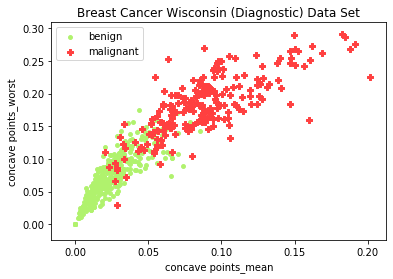

In [104]:
import matplotlib.pyplot as plt 

plt.scatter(X[y==0,0], X[y==0,1], color='#B0F26D', marker="o", s=15, label="benign")
plt.scatter(X[y==1,0], X[y==1,1], color = "#FF4040", marker="P", label="malignant")
plt.xlabel('concave points_mean')
plt.ylabel('concave points_worst')
plt.title('Breast Cancer Wisconsin (Diagnostic) Data Set')
plt.legend();

#### Задание 7
Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 

*Модели классификации:* 
-       классификатор ближайших соседей (к-во соседей = 3)
-       классификатор ближайших соседей (к-во соседей = 5) 
-       классификатор LDA 

Разобъем набор данных на обучающую и тестовую выборки:

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((398, 2), (398,), (171, 2), (171,))

*Классификатор ближайших соседей (к-во соседей = 3)*

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_3.fit(X_train, y_train)
knn_clf_3.score(X_test, y_test)

0.9181286549707602

*Классификатор ближайших соседей (к-во соседей = 5)*

In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_5.fit(X_train, y_train)
knn_clf_5.score(X_test, y_test)

0.9064327485380117

*Классификатор LDA*

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.score(X_test, y_test)

0.9122807017543859

#### Задание 8
Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  


Будем использовать следующую функцию для визуализации границы решения:

In [154]:
import numpy as np

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#E4FF73','#A5AAFF','#FFA584'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

*Визуализация границы для классификатор ближайших соседей (к-во соседей = 3)*

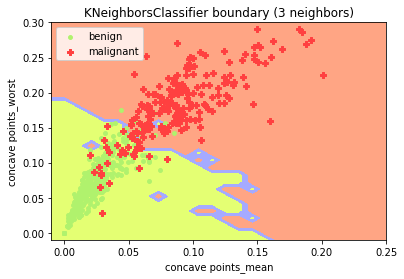

In [159]:
plot_decision_boundary(knn_clf_3, axis=[-0.01, 0.25, -0.01, 0.3])

plt.scatter(X[y==0,0], X[y==0,1], color='#B0F26D', marker="o", s=15, label="benign")
plt.scatter(X[y==1,0], X[y==1,1], color = "#FF4040", marker="P", label="malignant")
plt.xlabel('concave points_mean')
plt.ylabel('concave points_worst')
plt.title('KNeighborsClassifier boundary (3 neighbors)')
plt.legend();

Визуализация границы для классификатор ближайших соседей (к-во соседей = 5)

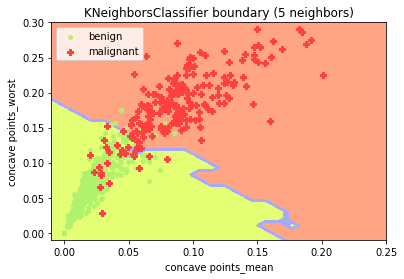

In [160]:
plot_decision_boundary(knn_clf_5, axis=[-0.01, 0.25, -0.01, 0.3])

plt.scatter(X[y==0,0], X[y==0,1], color='#B0F26D', marker="o", s=15, label="benign")
plt.scatter(X[y==1,0], X[y==1,1], color = "#FF4040", marker="P", label="malignant")
plt.xlabel('concave points_mean')
plt.ylabel('concave points_worst')
plt.title('KNeighborsClassifier boundary (5 neighbors)')
plt.legend();

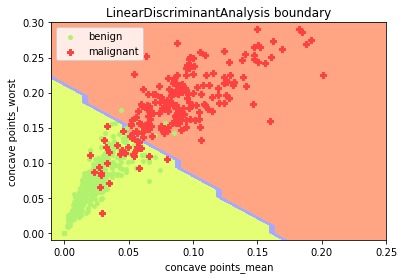

In [166]:
plot_decision_boundary(lda, axis=[-0.01, 0.25, -0.01, 0.3])

plt.scatter(X[y==0,0], X[y==0,1], color='#B0F26D', marker="o", s=15, label="benign")
plt.scatter(X[y==1,0], X[y==1,1], color = "#FF4040", marker="P", label="malignant")
plt.xlabel('concave points_mean')
plt.ylabel('concave points_worst')
plt.title('LinearDiscriminantAnalysis boundary')
plt.legend();

#### Задание 9
Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов. 

*Кривая для визуализации - ROC-кривая*

Используем библиотечную функцию:

In [176]:
from sklearn.metrics import roc_curve

decision_scores_knn3 = knn_clf_3.predict_proba(X_test)
decision_scores_knn3 = decision_scores_knn3[:,1]  # оставляем только положительные значения
fprs_knn3, tprs_knn3, thresholds_knn3 = roc_curve(y_test, decision_scores_knn3)

decision_scores_knn5 = knn_clf_5.predict_proba(X_test)
decision_scores_knn5 = decision_scores_knn5[:,1]
fprs_knn5, tprs_knn5, thresholds_knn5 = roc_curve(y_test, decision_scores_knn5)

decision_scores_lda = lda.decision_function(X_test)
fprs_lda, tprs_lda, thresholds_lda = roc_curve(y_test, decision_scores_lda)

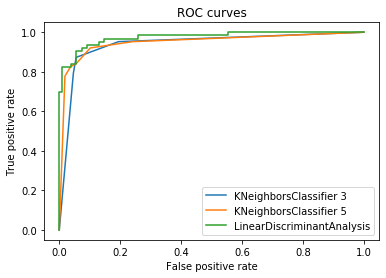

In [181]:
plt.plot(fprs_knn3, tprs_knn3, label='KNeighborsClassifier 3')
plt.plot(fprs_knn5, tprs_knn5, label='KNeighborsClassifier 5')
plt.plot(fprs_lda, tprs_lda, label='LinearDiscriminantAnalysis')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves')
plt.legend();



#### Задание 10
Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.  


In [182]:
from sklearn.metrics import roc_auc_score

auc_knn3 = roc_auc_score(y_test, decision_scores_knn3)
print('AUC of KNN for 3n: %.3f' % auc_knn3)

auc_knn5 = roc_auc_score(y_test, decision_scores_knn5)
print('AUC of KNN for 5n: %.3f' % auc_knn5)

auc_lda = roc_auc_score(y_test, decision_scores_lda)
print('AUC of LDA: %.3f' % auc_lda)

AUC of KNN for 3n: 0.939
AUC of KNN for 5n: 0.950
AUC of LDA: 0.975


Лучший метод бинарной классификации - линейный дискриминантный анализ